### 🧠 Predicting Football Match Outcomes Using Machine Learning

This notebook explores how various Python-based machine learning and data science libraries can be used to build a predictive model for football match outcomes. The goal is to predict whether the **home team** will win, lose, or draw a match based on match statistics.

We'll be working with historical match data from the English Premier League and applying supervised learning techniques to classify match results into one of three categories:
- **Win** (home team wins)
- **Draw** (match ends in a tie)
- **Loss** (home team loses)

We'll take the following approach:

1. **Problem definition**  
2. **Data**  
3. **Evaluation**  
4. **Features**  
5. **Modelling**  
6. **Experimentation**


## 1. Problem Definition


In a statement,  
  
> Given historical match data from the English Premier League, can we predict the outcome of a football match (Home Win, Draw, or Away Win) based on pre-match statistics?  
  
This project aims to develop a predictive model that can use features like team stats, previous results, and match details to estimate the likely outcome of a future match.

## 2. Data

The dataset contains match-by-match statistics from the English Premier League, including details such as the teams involved, match date, goals scored, possession, shots, fouls, and more.

## 3. Evaluation  
If we can reach at least 70% accuracy at predicting the correct outcome of a Premier League match (Home Win, Draw, or Away Win), we'll consider the proof of concept successful and worth iterating on further.
  
Why Accuracy?  
Since our target variable will likely be something like match result (e.g., 'H' for home win, 'D' for draw, 'A' for away win), this is a multiclass classification problem. In such cases, accuracy is a simple and intuitive metric that tells us how often our model is correct.  

## 4. Features

This is where we break down the various features available in the dataset. These features describe team statistics and match outcomes, and will help us build a predictive model for the result of a match (Home Win, Draw, or Away Win).

**Data Dictionary**

1. **Date** - The date on which the match was played.

2. **HomeTeam** - The name of the home team.

3. **AwayTeam** - The name of the away team.

4. **FTHG** - Full Time Home Goals  
   * Total number of goals scored by the home team at the end of the match.

5. **FTAG** - Full Time Away Goals  
   * Total number of goals scored by the away team at the end of the match.

6. **FTR** - Full Time Result  
   * Match outcome:  
     * `1` = Home Win  
     * `0` = Draw  
     * `-1` = Away Win  
   * This will be our **target variable**.

7. **HS** - Home Team Shots  
   * Number of shots taken by the home team.

8. **AS** - Away Team Shots  
   * Number of shots taken by the away team.

9. **HST** - Home Team Shots on Target  
   * Number of shots on target by the home team.

10. **AST** - Away Team Shots on Target  
    * Number of shots on target by the away team.

11. **HC** - Home Team Corners  
    * Number of corner kicks awarded to the home team.

12. **AC** - Away Team Corners  
    * Number of corner kicks awarded to the away team.



## 5. Preparing the Tools

First, we’ll import all the necessary libraries for data analysis, visualization, modeling, and evaluation.


In [6]:

# Regular EDA (exploratory data analysis) and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

In [7]:
#Load The Data
df = pd.read_csv("premier_league_match_data.csv")

## 6. EDA

In [8]:
#Basic information:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HC,AC,Season,Date,Outcome,OutcomeLabel
0,Fulham,Arsenal,0,3,5,13,2,6,2,3,2020-2021,2020-09-12,-1,Loss
1,Crystal Palace,Southampton,1,0,5,9,3,5,7,3,2020-2021,2020-09-12,1,Win
2,Liverpool,Leeds,4,3,22,6,6,3,9,0,2020-2021,2020-09-12,1,Win
3,West Ham,Newcastle,0,2,15,15,3,2,8,7,2020-2021,2020-09-12,-1,Loss
4,West Brom,Leicester,0,3,7,13,1,7,2,5,2020-2021,2020-09-13,-1,Loss


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomeTeam      1840 non-null   object
 1   AwayTeam      1840 non-null   object
 2   FTHG          1840 non-null   int64 
 3   FTAG          1840 non-null   int64 
 4   HS            1840 non-null   int64 
 5   AS            1840 non-null   int64 
 6   HST           1840 non-null   int64 
 7   AST           1840 non-null   int64 
 8   HC            1840 non-null   int64 
 9   AC            1840 non-null   int64 
 10  Season        1840 non-null   object
 11  Date          1840 non-null   object
 12  Outcome       1840 non-null   int64 
 13  OutcomeLabel  1840 non-null   object
dtypes: int64(9), object(5)
memory usage: 201.4+ KB


In [10]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              FTHG         FTAG           HS           AS          HST  \
count  1840.000000  1840.000000  1840.000000  1840.000000  1840.000000   
mean      1.566848     1.354891    13.980435    11.737500     4.894022   
std       1.352857     1.242105     5.785137     5.183328     2.630430   
min       0.000000     0.000000     1.000000     1.000000     0.000000   
25%       1.000000     0.000000    10.000000     8.000000     3.000000   
50%       1.000000     1.000000    13.000000    11.000000     5.000000   
75%       2.000000     2.000000    17.250000    15.000000     6.000000   
max       9.000000     8.000000    36.000000    37.000000    16.000000   

               AST           HC           AC      Outcome  
count  1840.000000  1840.000000  1840.000000  1840.000000  
mean      4.164674     5.688043     4.700543     0.094565  
std       2.400506     3.115411     2.813971     0.873620  
min       0.000000     0.000000     0.000000    -1.000000  
25%       2.

In [11]:
#Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
HomeTeam        0
AwayTeam        0
FTHG            0
FTAG            0
HS              0
AS              0
HST             0
AST             0
HC              0
AC              0
Season          0
Date            0
Outcome         0
OutcomeLabel    0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_1340\393848968.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="OutcomeLabel", palette="Set2")


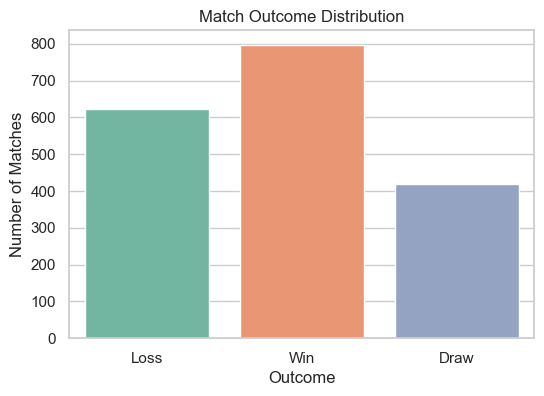

In [12]:
# Exploratory Data Analysis
# Plot distribution of target variable
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x="OutcomeLabel", palette="Set2")
plt.title("Match Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Number of Matches")
plt.show()

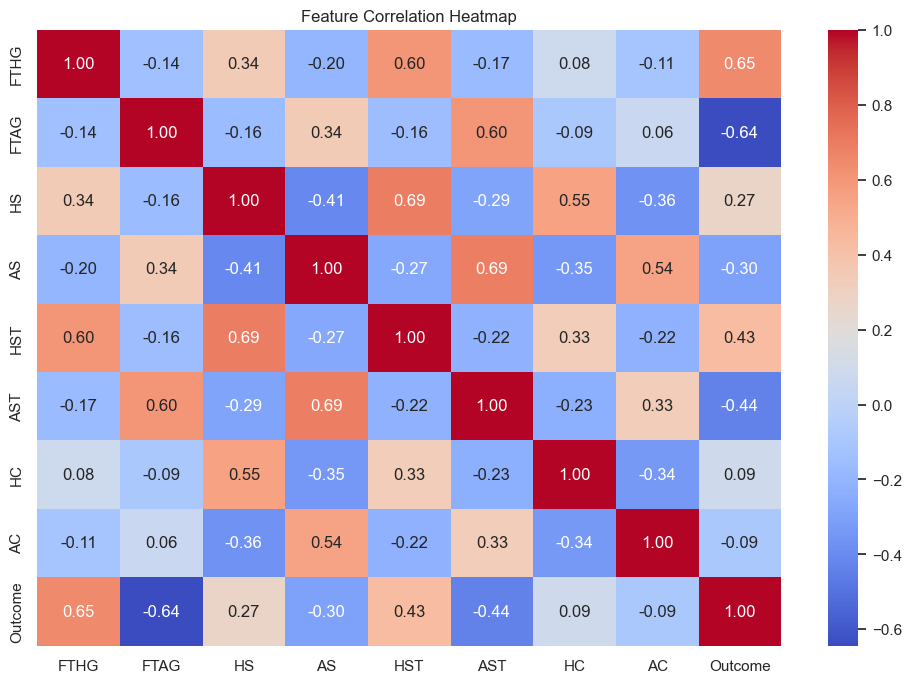

In [13]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


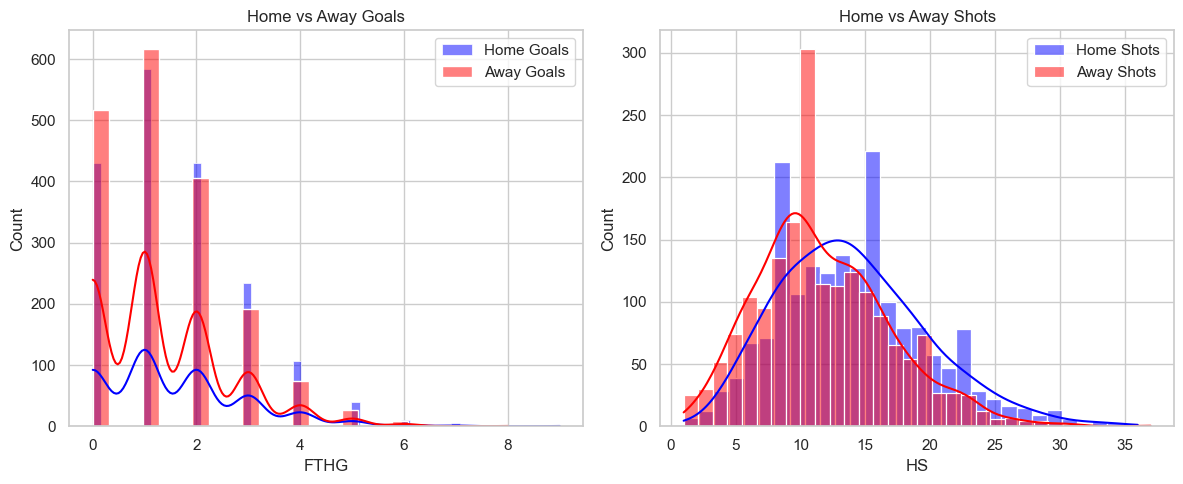

In [14]:
# Home vs Away Shots and Goals Comparison
# See if home teams generally perform better in terms of shots and goals.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["FTHG"], kde=True, color='blue', label='Home Goals', ax=axes[0])
sns.histplot(df["FTAG"], kde=True, color='red', label='Away Goals', ax=axes[0])
axes[0].set_title("Home vs Away Goals")
axes[0].legend()

sns.histplot(df["HS"], kde=True, color='blue', label='Home Shots', ax=axes[1])
sns.histplot(df["AS"], kde=True, color='red', label='Away Shots', ax=axes[1])
axes[1].set_title("Home vs Away Shots")
axes[1].legend()

plt.tight_layout()
plt.show()


## 7. Data Preprocessing

In [15]:
# Create a copy
df_processed = df.copy()

# Convert date to datetime
df_processed["Date"] = pd.to_datetime(df_processed["Date"])

# Extract useful date features
df_processed["Month"] = df_processed["Date"].dt.month
df_processed["Weekday"] = df_processed["Date"].dt.weekday

# Drop original OutcomeLabel and Date
df_processed.drop(columns=["OutcomeLabel", "Date"], inplace=True)

# One-hot encode categorical columns
df_processed = pd.get_dummies(df_processed, columns=["HomeTeam", "AwayTeam", "Season"], drop_first=True)

df_processed.head()



,FTHG,FTAG,HS,AS,HST,AST,HC,AC,Outcome,Month,...,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves,Season_2021-2022,Season_2022-2023,Season_2023-2024,Season_2024-2025
0,0,3,5,13,2,6,2,3,-1,9,...,False,False,False,False,False,False,False,False,False,False
1,1,0,5,9,3,5,7,3,1,9,...,True,False,False,False,False,False,False,False,False,False
2,4,3,22,6,6,3,9,0,1,9,...,False,False,False,False,False,False,False,False,False,False
3,0,2,15,15,3,2,8,7,-1,9,...,False,False,False,False,False,False,False,False,False,False
4,0,3,7,13,1,7,2,5,-1,9,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Preprocess Data
# Features and labels
X = df_processed.drop("Outcome", axis=1)
y = df_processed["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 8.Modelling

In [17]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n===== {name} =====")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



===== Logistic Regression =====
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       149
           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       142

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368


===== Random Forest =====
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       149
           0       0.97      0.96      0.97        77
           1       0.99      0.99      0.99       142

    accuracy                           0.99       368
   macro avg       0.98      0.98      0.98       368
weighted avg       0.99      0.99      0.99       368


===== K-Nearest Neighbors =====
Accuracy: 0.66
Classification Report:
              precision    reca

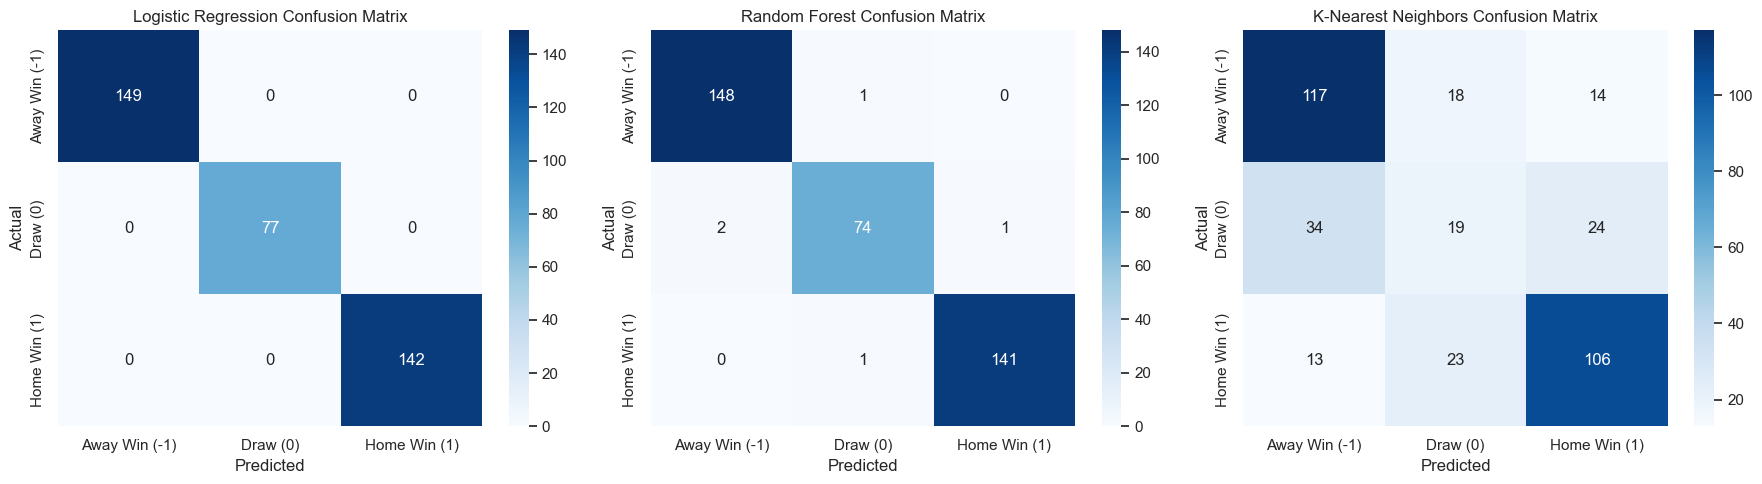

In [18]:
# Class labels for the confusion matrix
class_names = ["Away Win (-1)", "Draw (0)", "Home Win (1)"]

plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
    
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

## 9. Hyper Parameter Tuning

In [19]:
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")  # Optional: to suppress warnings

# 1. Random Forest Hyperparameter Grid (using scipy.stats randint)
rf_params = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring="accuracy",
    random_state=42
)

rf_search.fit(X_train, y_train)

# 2. KNN Hyperparameter Grid
knn_params = {
    "n_neighbors": randint(3, 20),
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # Manhattan and Euclidean
}

knn_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=knn_params,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring="accuracy",
    random_state=42
)

knn_search.fit(X_train, y_train)

# Results
print("\n✅ Best Random Forest Parameters:", rf_search.best_params_)
print("🔍 Best Random Forest CV Accuracy:", rf_search.best_score_)

print("\n✅ Best KNN Parameters:", knn_search.best_params_)
print("🔍 Best KNN CV Accuracy:", knn_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 268}
🔍 Best Random Forest CV Accuracy: 0.9667081747953418

✅ Best KNN Parameters: {'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}
🔍 Best KNN CV Accuracy: 0.690882047734348


In [20]:
# Best models from tuning
best_rf = rf_search.best_estimator_
best_knn = knn_search.best_estimator_

# Evaluate on test set
for name, model in [("Tuned Random Forest", best_rf), ("Tuned KNN", best_knn)]:
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



=== Tuned Random Forest ===
Accuracy: 0.98
              precision    recall  f1-score   support

          -1       0.99      0.98      0.98       149
           0       0.95      0.94      0.94        77
           1       0.98      0.99      0.99       142

    accuracy                           0.98       368
   macro avg       0.97      0.97      0.97       368
weighted avg       0.98      0.98      0.98       368


=== Tuned KNN ===
Accuracy: 0.74
              precision    recall  f1-score   support

          -1       0.79      0.83      0.81       149
           0       0.50      0.25      0.33        77
           1       0.75      0.92      0.82       142

    accuracy                           0.74       368
   macro avg       0.68      0.66      0.66       368
weighted avg       0.71      0.74      0.72       368



In [31]:
# We finalize Logistic regression as our final model
# Define models
model= LogisticRegression(max_iter=1000)
    

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       149
           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       142

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



## 10. Saving Our Model

In [34]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(model, "logistic_model.pkl")


print("✅ Model saved successfully!")


✅ Model saved successfully!
